In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales-dataset/coffee_sales_dataset.csv


Objective¶  
This dataset contains detailed records of coffee sales from a vending machine.  
The dataset spans from March 2024 to Present time, capturing daily transaction
data. In this notebook, we are going to use EDA to discover the customer's
purchasing patterns and sales trends which can aid in the inventory planning.

**Import packages**

In [2]:
import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g., pd.read_csv)
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced data visualization
import datetime as dt  # Date and time manipulation
import warnings  # Warning suppression

# Suppress warnings
warnings.filterwarnings('ignore')

# Import OS module for directory traversal
import os

# Loop through files in Kaggle input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/coffee-sales-dataset/coffee_sales_dataset.csv


In [3]:
coffee_data =pd.read_csv('/kaggle/input/coffee-sales-dataset/coffee_sales_dataset.csv')

**EDA**

In [4]:
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,01-03-2024,15:50.5,card,ANON-0000-0000-0001,38.7,Latte
1,01-03-2024,19:22.5,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,01-03-2024,20:18.1,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,01-03-2024,46:33.0,card,ANON-0000-0000-0003,28.9,Americano
4,01-03-2024,48:14.6,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
coffee_data.isnull().sum()


date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [7]:
coffee_data.duplicated().sum()

0

In [8]:
coffee_data.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


In [9]:
coffee_data.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


● There are 1033 transactions in the data.  
● 89 missing values in the column 'card'.  
● No duplicates.  
● 2 unique values of 'cash_type'.  
● 8 different coffee types with 'Americano with Milk' is the most popular
product.  


Let's check the transactions with missing value in 'card'.  

In [10]:
coffee_data[coffee_data['card'].isnull()]['cash_type'].value_counts()

cash_type
cash    89
Name: count, dtype: int64

**All of the transactions with null 'card' information are from cash users.**

<Axes: >

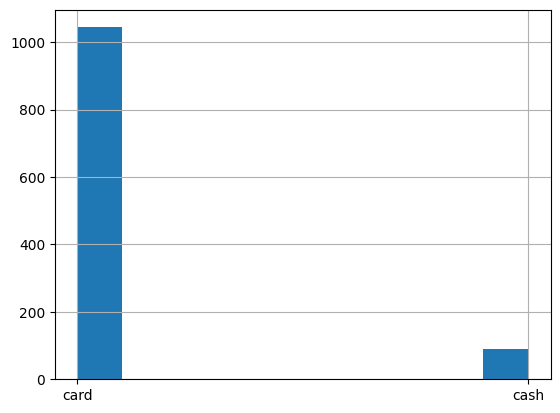

In [11]:
coffee_data['cash_type'].hist()

In [12]:
coffee_data['cash_type'].value_counts(normalize=True)

cash_type
card    0.921447
cash    0.078553
Name: proportion, dtype: float64

In [13]:
pd.DataFrame(coffee_data['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


Americano with Milk and Latte are our most popular coffee products. In the
second tier are Cappuccino and Americano, while Cortado, Hot Chocolate,
Espresso, and Cocoa are less popular.  
Next, let's conduct data transformations for further analysis

In [14]:

# Convert to datetime
coffee_data['date'] = pd.to_datetime(coffee_data['date'], errors='coerce')
coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'], errors='coerce')

# Handle missing values
coffee_data.dropna(subset=['date', 'datetime'], inplace=True)

# Extract time components
coffee_data['month'] = coffee_data['date'].dt.strftime('%Y-%m')
coffee_data['day'] = coffee_data['date'].dt.strftime('%w')
coffee_data['hour'] = coffee_data['datetime'].dt.strftime('%H')

# Display DataFrame information
coffee_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 0 to 959
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         171 non-null    datetime64[ns]
 1   datetime     171 non-null    datetime64[ns]
 2   cash_type    171 non-null    object        
 3   card         158 non-null    object        
 4   money        171 non-null    float64       
 5   coffee_name  171 non-null    object        
 6   month        171 non-null    object        
 7   day          171 non-null    object        
 8   hour         171 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 13.4+ KB


In [15]:
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-01-03,2025-06-27 15:50:30,card,ANON-0000-0000-0001,38.7,Latte,2024-01,3,15
1,2024-01-03,2025-06-27 19:22:30,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-01,3,19
2,2024-01-03,2025-06-27 20:18:06,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-01,3,20
6,2024-01-03,2025-06-27 19:02:48,card,ANON-0000-0000-0006,38.7,Hot Chocolate,2024-01,3,19
8,2024-01-03,2025-06-27 22:01:48,card,ANON-0000-0000-0008,38.7,Cocoa,2024-01,3,22


In [16]:
[coffee_data['date'].min(),coffee_data['date'].max()]

[Timestamp('2024-01-03 00:00:00'), Timestamp('2024-12-07 00:00:00')]

The time range of this data set is from 2023-3-1 to 2024-7-31  
Let's first check the overal revenue by products.


Text(0.5, 0, 'Revenue')

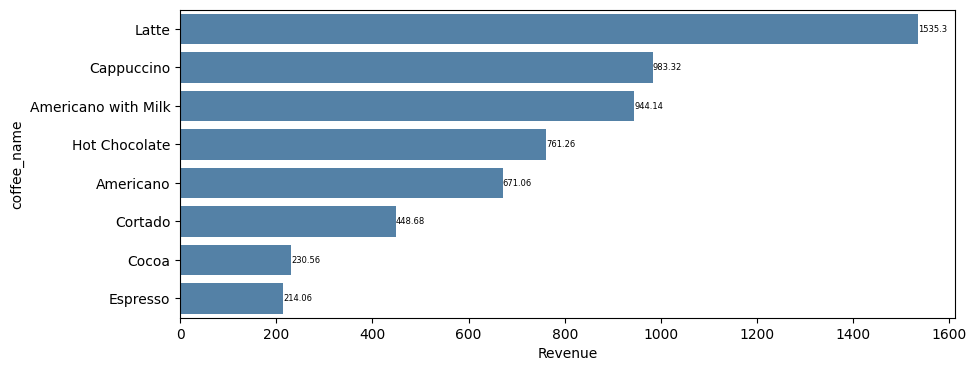

In [17]:
revenue_data =coffee_data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)
plt.figure(figsize=(10,4))
ax =sns.barplot(data=revenue_data,x='money',y='coffee_name',color='steelblue')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Revenue')


Latte is the product with the highest revenue, while Expresso is the one at the
bottom. 

Then let's check the monthly data.

In [18]:
monthly_sales =coffee_data.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-01,NaN,5.0,1.0,1.0,NaN,1.0,3.0,1.0
1,2024-02,3.0,2.0,1.0,NaN,1.0,NaN,NaN,3.0
2,2024-03,1.0,2.0,2.0,1.0,2.0,NaN,2.0,5.0
3,2024-04,NaN,1.0,NaN,NaN,2.0,1.0,2.0,2.0
4,2024-05,3.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0
5,2024-06,5.0,4.0,5.0,NaN,1.0,NaN,NaN,6.0
6,2024-07,NaN,3.0,4.0,NaN,3.0,1.0,3.0,4.0
7,2024-08,3.0,1.0,3.0,NaN,1.0,NaN,NaN,2.0
8,2024-09,6.0,5.0,5.0,NaN,2.0,2.0,2.0,7.0
9,2024-10,1.0,1.0,NaN,NaN,NaN,2.0,2.0,4.0


In [19]:
monthly_sales.describe().T.loc[:,['min','max']]


,min,max
coffee_name,,
Americano,1.0,6.0
Americano with Milk,1.0,5.0
Cappuccino,1.0,5.0
Cocoa,1.0,3.0
Cortado,1.0,3.0
Espresso,1.0,2.0
Hot Chocolate,1.0,4.0
Latte,1.0,7.0


([<matplotlib.axis.XTick at 0x7fe3c443ccd0>,
 [Text(0, 0, '2024-01'),
  Text(1, 0, '2024-02'),
  Text(2, 0, '2024-03'),
  Text(3, 0, '2024-04'),
  Text(4, 0, '2024-05'),
  Text(5, 0, '2024-06'),
  Text(6, 0, '2024-07'),
  Text(7, 0, '2024-08'),
  Text(8, 0, '2024-09'),
  Text(9, 0, '2024-10'),
  Text(10, 0, '2024-11'),
  Text(11, 0, '2024-12')])

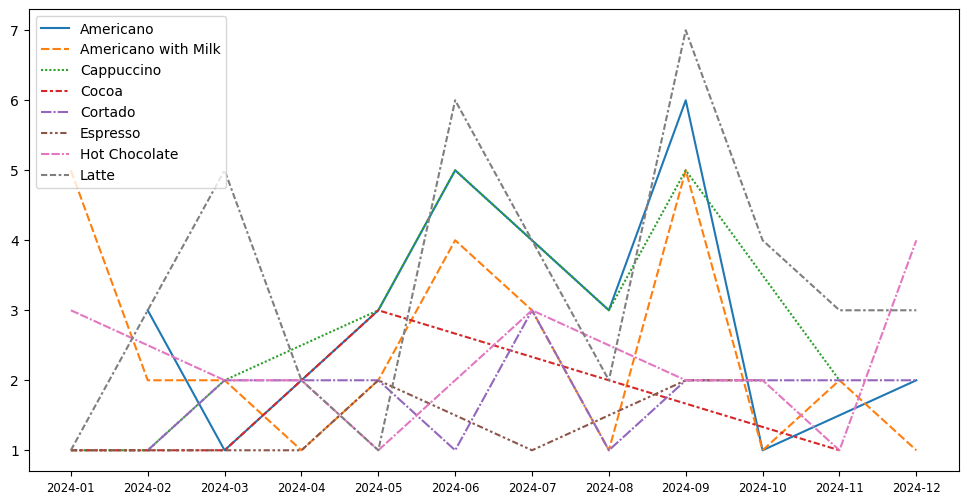

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')

As shown in the line chart above, Americano with Milk and Latte, and
Cappuccino are top selling coffee types, while Cocoa and Expresso have
lowest sales. Additionally, Americano with Milk and Latte show an upward
trending.


In [21]:
weekday_sales =coffee_data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales


,day,count
0,0,24
1,1,15
2,2,31
3,3,29
4,4,30
5,5,23
6,6,19


([<matplotlib.axis.XTick at 0x7fe3c43614d0>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thur'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

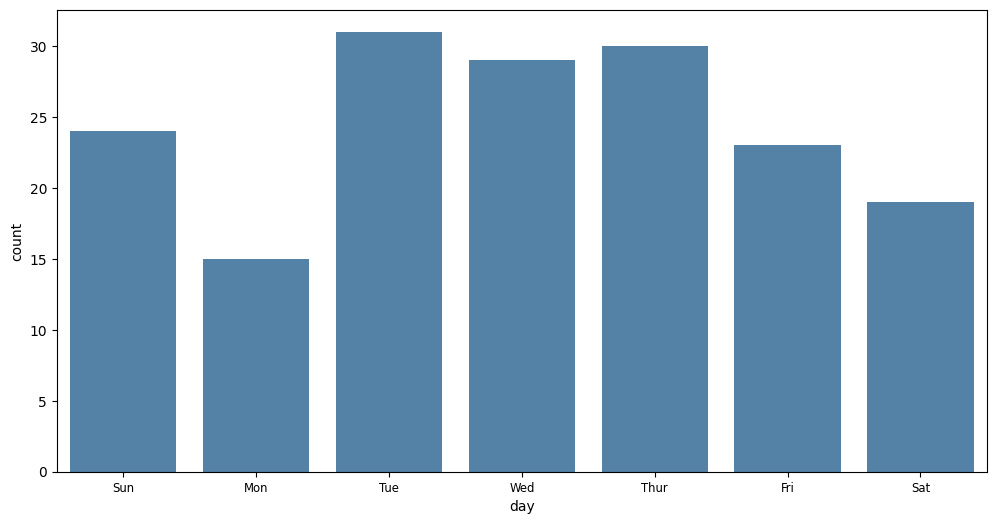

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='day',y='count',color='steelblue')
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')

The bar chart reveals that Tuesday has the highest sales of the week, while
sales on the other days are relatively similar.

In [23]:
daily_sales =coffee_data.groupby(['coffee_name','date']).count()['datetime'].reset_index().reset_index().rename(columns={'datetime':'count'}).pivot(index='date',columns='coffee_name',values='count').reset_index().fillna(0)
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-01-03,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0
1,2024-01-04,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-06,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-01-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2024-02-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2024-02-04,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,2024-02-05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,2024-02-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,2024-02-07,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2024-03-03,0.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0


In [24]:
daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.0,3.0
Americano with Milk,0.0,2.0
Cappuccino,0.0,3.0
Cocoa,0.0,1.0
Cortado,0.0,2.0
Espresso,0.0,1.0
Hot Chocolate,0.0,3.0
Latte,0.0,3.0


This table provides us the infomation of how many of each products can be
sold in each day.


In [25]:
hourly_sales =coffee_data.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales

,hour,count
0,01,8
1,02,5
2,03,9
3,04,10
4,05,6
5,06,6
6,07,7
7,08,5
8,09,6
9,10,5


<Axes: xlabel='hour', ylabel='count'>

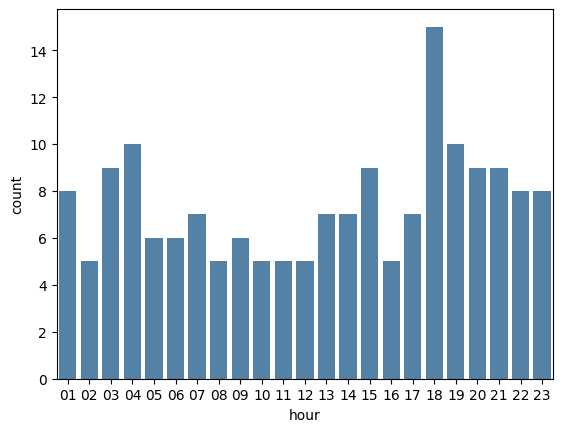

In [26]:
sns.barplot(data=hourly_sales,x='hour',y='count',color='steelblue')

Overall, two peak hours within each day can be observed: 10:00am and
7:00pm. Then, let's check if any difference for different products.

In [27]:
hourly_sales_by_coffee =coffee_data.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',
columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,01,2.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0
1,02,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
2,03,2.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0
3,04,0.0,2.0,2.0,0.0,2.0,1.0,1.0,2.0
4,05,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0
5,06,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0
6,07,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0
7,08,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0
8,09,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
9,10,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


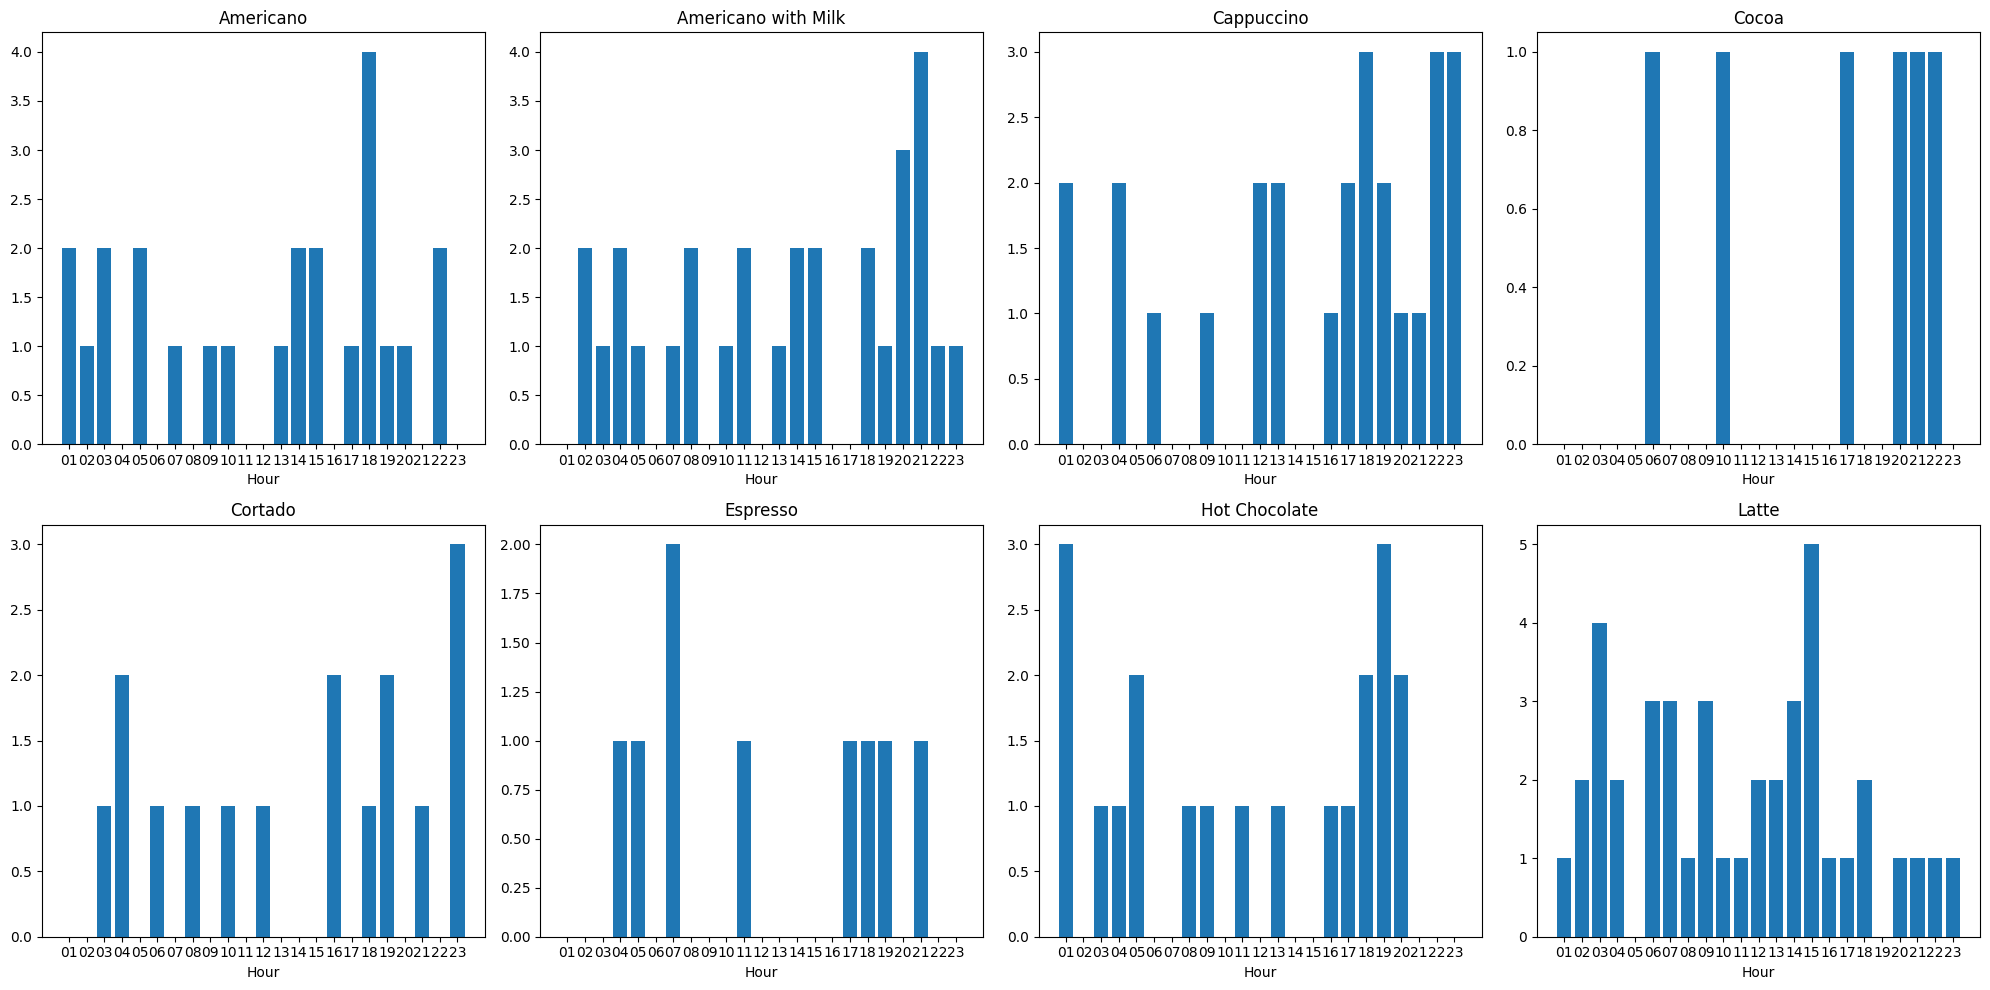

In [28]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
# Flatten the array of subplots for easy iteration
axs = axs.flatten()
# Loop through each column in the DataFrame, skipping the'Index' column
for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):
# Skip the first column ('Index')
    axs[i].bar(hourly_sales_by_coffee['hour'],hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')
#axs[i].set_ylabel('Sales')
plt.tight_layout()
# Show the plot
plt.show()

The plots above illustrate the shopping traffic for each product throughout the
day. Notably, all products experience a peak in traffic around 10:00 AM, with
this trend being particularly pronounced for Latte. Additionally, Cappuccino,
Cocoa, and Hot Chocolate tend to be more popular during the evening hours,
specifically between 6:00pm and 8:00pm.


**Conclusion**

From the analysis above, we have uncovered valuable insights into customer
shopping patterns on a daily and weekly basis. We have identified the most
popular coffee products and observed the shopping trends over time. These
findings are instrumental in optimizing inventory planning, designing the
layout of vending machines, and determining the ideal restock times for coffee
products.